In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pandas_profiling import ProfileReport
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

%load_ext nb_black
warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
# from google.colab import files

# uploaded = files.upload()

<IPython.core.display.Javascript object>

In [2]:
#%%time
df = pd.read_excel("Online_Retail.xlsx")

<IPython.core.display.Javascript object>

### Explorator Data Analysis (EDA)

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


<IPython.core.display.Javascript object>

In [4]:
df.shape

(541909, 8)

<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<IPython.core.display.Javascript object>

In [6]:
"""
=> tồn tại giá trị null tại Description, CustomerID
"""

'\n=> tồn tại giá trị null tại Description, CustomerID\n'

<IPython.core.display.Javascript object>

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<IPython.core.display.Javascript object>

In [8]:
df.loc[df.Quantity <= 0].shape

(10624, 8)

<IPython.core.display.Javascript object>

### Xử lý các giá trị null, vô lý

In [59]:
# loại bỏ các dòng có giá trị âm tại quantity (vô lý)
# df_new = df.copy()
df_new = df.loc[df["Quantity"] > 0]

<IPython.core.display.Javascript object>

In [60]:
df_new.shape

(531285, 8)

<IPython.core.display.Javascript object>

In [61]:
# loại bỏ các giá trị null tại CustomerID
df_new = df_new[df.CustomerID.notna()]

<IPython.core.display.Javascript object>

In [62]:
df_new.shape

(397924, 8)

<IPython.core.display.Javascript object>

In [63]:
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


<IPython.core.display.Javascript object>

In [64]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


<IPython.core.display.Javascript object>

In [65]:
"""
=> về cơ bản, dataset đã ko có dữ liệu null
"""

'\n=> về cơ bản, dataset đã ko có dữ liệu null\n'

<IPython.core.display.Javascript object>

In [69]:
# profile = ProfileReport(df_new)
# profile.to_file("Online_Retai.html")

<IPython.core.display.Javascript object>

In [70]:
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


<IPython.core.display.Javascript object>

In [71]:
# ktra lại xem còn dữ liệu nào null ko
df_new.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<IPython.core.display.Javascript object>

### Xét InvoiceDate

In [72]:
df_new.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

<IPython.core.display.Javascript object>

In [73]:
df_new.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

<IPython.core.display.Javascript object>

In [74]:
"""
để dữ liệu dc đầy đủ và nhất quán, do vào 2011-12-09 là date cuối cùng của InvoiceDate (ko đủ hết tháng 12) nên ta drop dữ liệu này lại!
"""

'\nđể dữ liệu dc đầy đủ và nhất quán, do vào 2011-12-09 là date cuối cùng của InvoiceDate (ko đủ hết tháng 12) nên ta drop dữ liệu này lại!\n'

<IPython.core.display.Javascript object>

In [75]:
df_new = df_new.loc[df_new.InvoiceDate < "2011-12-1"]

<IPython.core.display.Javascript object>

In [39]:
df_new.shape

(380620, 8)

<IPython.core.display.Javascript object>

In [76]:
df_new["Sales"] = df.Quantity * df.UnitPrice

<IPython.core.display.Javascript object>

In [77]:
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,5.00
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11.90
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,12.48
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,7.95


<IPython.core.display.Javascript object>

In [82]:
# Tính total sale, ordercount, AvgOrderValue cho từng khách hàng theo CustomerID
customer_df = df_new.groupby("CustomerID").agg(
    {"Sales": sum, "InvoiceNo": lambda x: x.nunique()}
)

<IPython.core.display.Javascript object>

In [83]:
customer_df

,Sales,InvoiceNo
CustomerID,,
12346.0,77183.60,1
12347.0,4085.18,6
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1
...,...,...
18280.0,180.60,1
18281.0,80.82,1
18282.0,100.21,1


<IPython.core.display.Javascript object>

In [84]:
# tạo các cột thuộc tính total sale, ordercount, AvgOrderValue cho customer_df
customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']


<IPython.core.display.Javascript object>

In [85]:
customer_df

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
...,...,...,...
18280.0,180.60,1,180.600000
18281.0,80.82,1,80.820000
18282.0,100.21,1,100.210000


<IPython.core.display.Javascript object>

### Áp dụng phân tích chính với customer_df

In [86]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4298 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TotalSales     4298 non-null   float64
 1   OrderCount     4298 non-null   int64  
 2   AvgOrderValue  4298 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 134.3 KB


<IPython.core.display.Javascript object>

In [87]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,1952.818779,4.131689,400.255621
std,8354.913254,7.420253,1271.187289
min,0.000000,1.000000,0.000000
25%,304.305000,1.000000,178.602500
50%,657.265000,2.000000,295.033958
75%,1599.515000,4.000000,431.594250
max,268478.000000,201.000000,77183.600000


<IPython.core.display.Javascript object>

In [88]:
np.ptp(customer_df.OrderCount)

200

<IPython.core.display.Javascript object>

In [89]:
np.ptp(customer_df.TotalSales)

268478.0

<IPython.core.display.Javascript object>

In [90]:
np.ptp(customer_df.AvgOrderValue)

77183.6

<IPython.core.display.Javascript object>

In [91]:
"""
=> có sự khác biệt về thang đo của các dữ liệu!
"""

'\n=> có sự khác biệt về thang đo của các dữ liệu!\n'

<IPython.core.display.Javascript object>

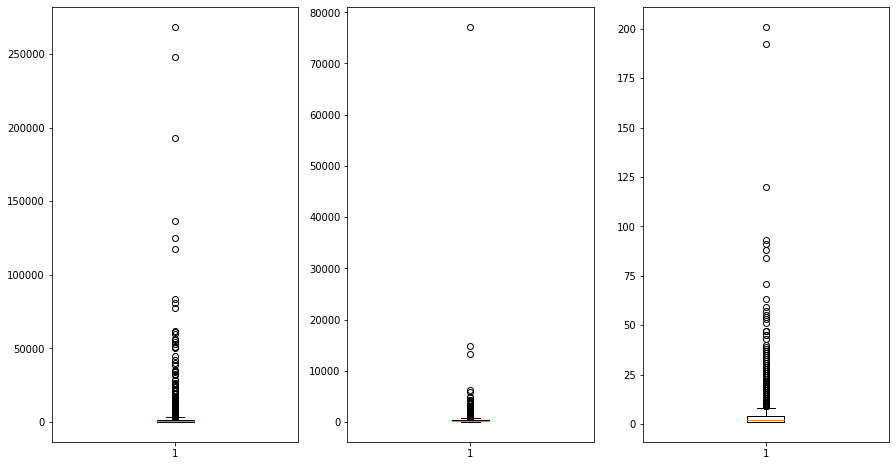

<IPython.core.display.Javascript object>

In [98]:
%matplotlib inline

plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.boxplot(customer_df.TotalSales)
plt.subplot(1, 3, 2)
plt.boxplot(customer_df.AvgOrderValue)
plt.subplot(1, 3, 3)
plt.boxplot(customer_df.OrderCount)
plt.show()